# ML Course 2 - Data Preparation - TP

### <span style="color:red">  SENA NUR BILGIN </span>   

## Subject

We provide here a data set on the customers of a bank:
- CustomerId = customer id in the information system of the bank
- Surname = surname of the customer
- CreditScore = score attributed by the bank as estimation of capacity to reimburse a loan
- Geography = country of the customer
- Gender = sex of the customer
- Age = age of the customer
- Tenure = loan duration (year)
- Balance = amount of money on main account (\$)
- NumOfProducts = number of products the customer has in the banl
- HasCrCard = tells if the customer owns a credit card
- IsActiveMember = tells if the customer has an active account
- EstimatedSalary = estimated salary of the customer (\$)
- Exited = tells if the customer has left the bank

In [3]:
## Libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import zscore




/var/folders/dl/y6c96df54f7byh59bmz0bpv00000gn/T/ipykernel_57505/1703148438.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
dataset_raw = pd.read_csv('/Users/xenanurbilgin/XENA_FOLDERS/EPITA/EPITA_SENA/Machine_Learning/Assignment_02/bank_churn.csv', index_col=0)
dataset_raw.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,yes
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,no
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,yes
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,no
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,no


The objective of the bank is to predict the churn, i.e. if a customer is likely to leave the bank, based on his/her profile (estimated salary, geography, age, etc.).
Here, we will prepare the data set so that it can be directly used for ML processing. The work is limited to data exploration and preparation, we will not make ML prediction yet. 

CustomerId, RowNumber,Surname,HasCrCard,

# Data Exploration 
Perform data exploration to answer the following two questions.

For each graph/table you make, you should:
- Plot the graph, or display the table
- Povide a title, axis labels and legend if applicable

### Question 1: Are there some features that are correlated with each other?

In [5]:

# Map 'yes' and 'no' to 1 and 0 in the 'Exited' column
dataset_raw['Exited'] = dataset_raw['Exited'].map({'yes': 1, 'no': 0})
# Select only numeric columns for correlation calculation
numeric_columns = dataset_raw.select_dtypes(include=['number'])
# Calculate the correlation matrix among numeric features
corr = numeric_columns.corr()
# Apply the gradient color map to the correlation matrix and display it
corr.style.background_gradient(cmap='coolwarm')
# Other good diverging colormaps: 'RdBu_r', 'BrBG_r', & 'PuOr_r'

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.003911,0.005752,0.002196,-0.006236,-0.009115,0.007455,0.000299,0.012065,-0.006113,-0.016383
CustomerId,0.003911,1.000000,0.004210,0.011079,-0.014968,-0.012437,0.017147,-0.013948,0.001688,0.015492,-0.006213
CreditScore,0.005752,0.004210,1.000000,-0.005232,0.001712,0.006604,0.012188,-0.005574,0.025005,0.000065,-0.026430
Age,0.002196,0.011079,-0.005232,1.000000,-0.009512,0.027752,-0.029477,-0.010822,0.085369,-0.006501,0.284786
Tenure,-0.006236,-0.014968,0.001712,-0.009512,1.000000,-0.012145,0.013470,0.022652,-0.028094,0.007980,-0.013852
Balance,-0.009115,-0.012437,0.006604,0.027752,-0.012145,1.000000,-0.304439,-0.014903,-0.010270,0.012610,0.118540
NumOfProducts,0.007455,0.017147,0.012188,-0.029477,0.013470,-0.304439,1.000000,0.002970,0.009777,0.014379,-0.047987
HasCrCard,0.000299,-0.013948,-0.005574,-0.010822,0.022652,-0.014903,0.002970,1.000000,-0.011650,-0.009696,-0.007189
IsActiveMember,0.012065,0.001688,0.025005,0.085369,-0.028094,-0.010270,0.009777,-0.011650,1.000000,-0.010573,-0.156242
EstimatedSalary,-0.006113,0.015492,0.000065,-0.006501,0.007980,0.012610,0.014379,-0.009696,-0.010573,1.000000,0.011954


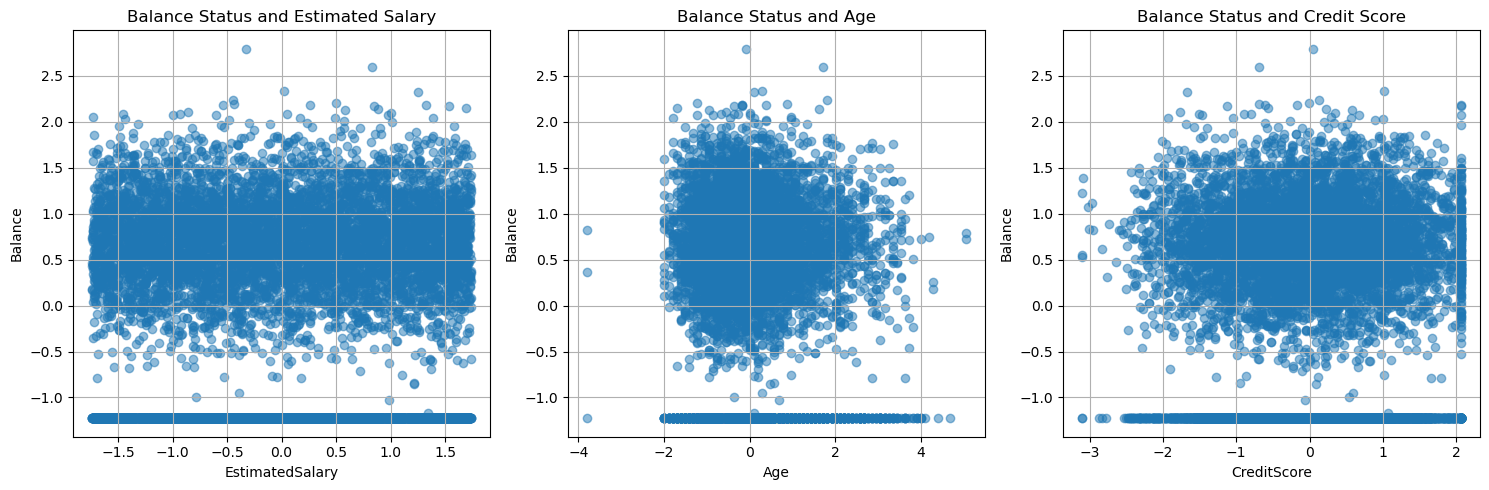

All results indicate the weak correlation between the variables!


In [3]:
#The plotting parameters:
#- x_variables: Here we have the names of the variables to be plotted on the x-axes.
#- y_variables: Here we have the names of the variables to be plotted on the y-axes.

def plot_scatter_subplots(dataset, x_variables, y_variables, titles):
    num_plots = len(x_variables)
    fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(15, 5))
    # Initialize StandardScaler
    scaler = StandardScaler()

    for i in range(num_plots):
        # Standardize the variables, better for the data visualization since we have different ranges.
        dataset_standardized = scaler.fit_transform(dataset[[x_variables[i], y_variables[i]]])
        # Convert the standardized data back to a DataFrame (if needed)
        dataset_standardized = pd.DataFrame(dataset_standardized, columns=[x_variables[i], y_variables[i]])
        
        # Scatter plot
        axes[i].scatter(dataset_standardized[x_variables[i]], dataset_standardized[y_variables[i]], alpha=0.5)
        axes[i].set_title(titles[i])
        axes[i].set_xlabel(x_variables[i])
        axes[i].set_ylabel(y_variables[i])
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()
    

# Example usage:
x_variables = ['EstimatedSalary', 'Age', 'CreditScore']
y_variables = ['Balance', 'Balance', 'Balance']
titles = ['Balance Status and Estimated Salary', 'Balance Status and Age', 'Balance Status and Credit Score']
plot_scatter_subplots(dataset_raw, x_variables, y_variables, titles)

 
print('All results indicate the weak correlation between the variables!')


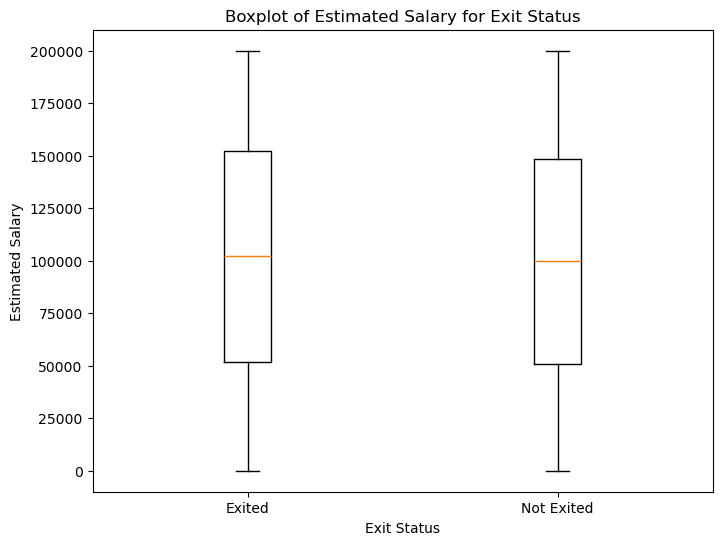

         count           mean           std    min        25%         50%  \
Exited                                                                      
no      7972.0   99743.442056  57402.226209  90.07  50783.685   99649.585   
yes     2038.0  101450.497610  57902.256593  11.58  51924.020  102431.875   

                75%        max  
Exited                          
no      148630.9225  199992.48  
yes     152359.1300  199808.10  
There is not a specific relationship between the Estimated Salary and the exit status. Not significant mean differences.


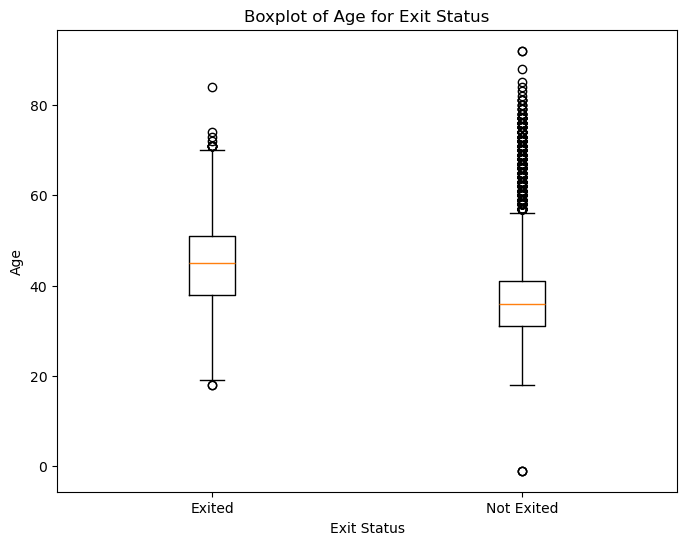

         count       mean        std   min   25%   50%   75%   max
Exited                                                            
no      7972.0  37.395886  10.148209  -1.0  31.0  36.0  41.0  92.0
yes     2038.0  44.826791   9.772268  18.0  38.0  45.0  51.0  84.0
Most likely, older people are exiting from the bank. Considerable mean difference.


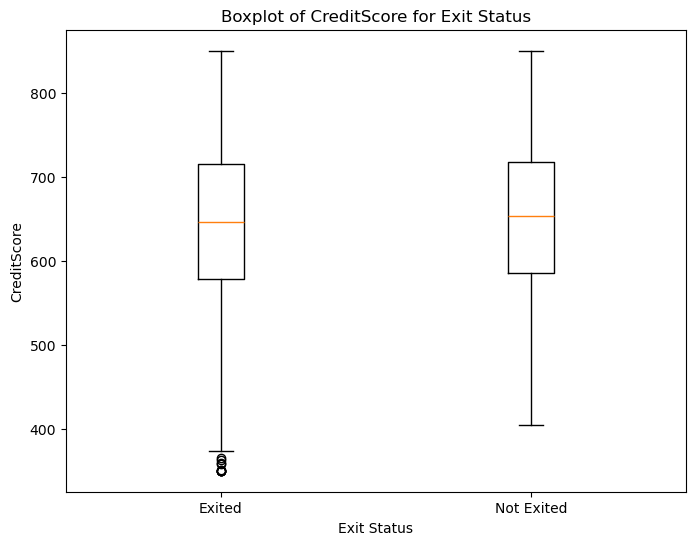

         count        mean         std    min    25%    50%    75%    max
Exited                                                                   
no      7738.0  651.485784   95.820748  405.0  585.0  653.0  718.0  850.0
yes     1977.0  645.136065  100.074998  350.0  578.0  646.0  715.0  850.0
There is not a specific relationship between the Credit Score and the exit status. However, we might have considerable mean differences.


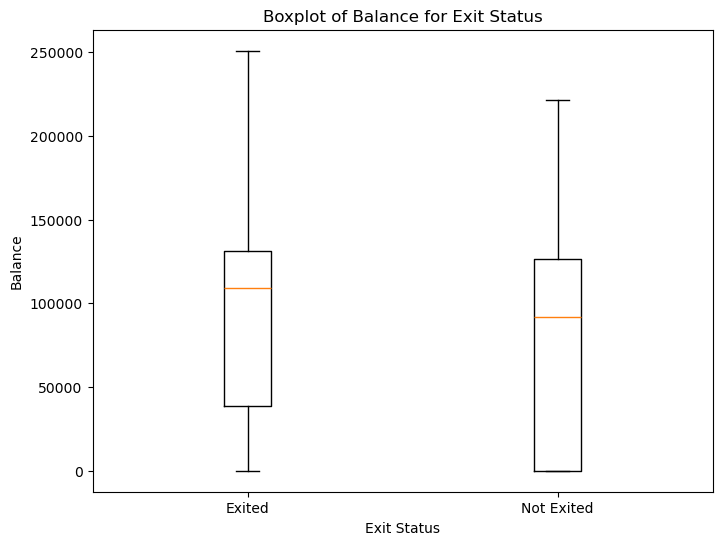

         count          mean           std  min         25%         50%  \
Exited                                                                    
no      7972.0  72748.373116  62840.069147  0.0      0.0000   92093.145   
yes     2038.0  91113.652228  58346.924427  0.0  38591.2225  109344.230   

                75%        max  
Exited                          
no      126386.3600  221532.80  
yes     131423.6375  250898.09  
Most likely,  people with higher balance are exiting from the bank. Considerable mean difference.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Investigation of relationship between Exit Status and Estimated Salary/Age Score*:

def plot_boxplot_and_descriptives(data, column, label):
    # Plot boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot([data.loc[data['Exited'] == 'yes', column].dropna(), 
                 data.loc[data['Exited'] == 'no', column].dropna()],
                labels=['Exited', 'Not Exited'])
    plt.xlabel('Exit Status')
    plt.ylabel(label)
    plt.title(f'Boxplot of {label} for Exit Status')
    plt.show()

    # Descriptives
    exit_by_column = data.groupby('Exited')[column].describe()
    print(exit_by_column)

# Plot boxplot and descriptives for EstimatedSalary
plot_boxplot_and_descriptives(dataset_raw, 'EstimatedSalary', 'Estimated Salary')
print("There is not a specific relationship between the Estimated Salary and the exit status. Not significant mean differences.")

# Plot boxplot and descriptives for Age
plot_boxplot_and_descriptives(dataset_raw, 'Age', 'Age')
print("Most likely, older people are exiting from the bank. Considerable mean difference.")


# Plot boxplot and descriptives for Age
plot_boxplot_and_descriptives(dataset_raw, 'CreditScore', 'CreditScore')
print("There is not a specific relationship between the Credit Score and the exit status. However, we might have considerable mean differences.")


# Plot boxplot and descriptives for Age
plot_boxplot_and_descriptives(dataset_raw, 'Balance', 'Balance')
print("Most likely,  people with higher balance are exiting from the bank. Considerable mean difference.")



LETS LOOK IN MORE DETAIL:

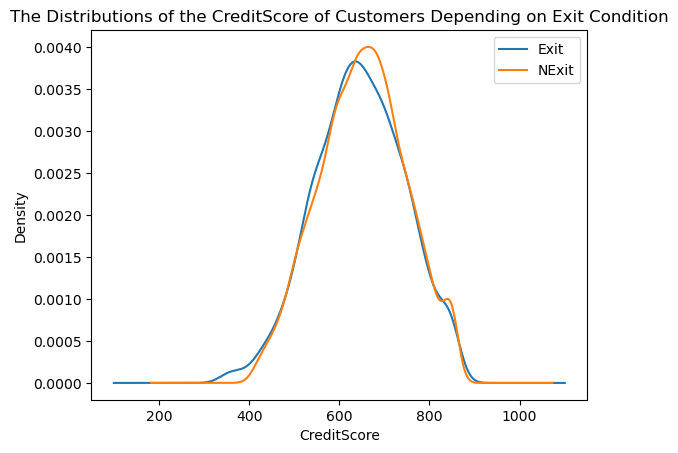

         count        mean         std    min    25%    50%    75%    max
Exited                                                                   
no      7738.0  651.485784   95.820748  405.0  585.0  653.0  718.0  850.0
yes     1977.0  645.136065  100.074998  350.0  578.0  646.0  715.0  850.0
There isn't a significant difference in the distribution of credit scores between customers who have exited and those who haven't


In [5]:
# Investigation of relationship between Exit Status and Credit Score*:
# Define the Exited_list as a dictionary
Exited_list = {"yes": 'Exit', "no": 'NExit'}
# Plot each port separately with a different color
for variety, labels in Exited_list.items():
    subset = dataset_raw.loc[dataset_raw['Exited'] == variety, ['CreditScore']]
    subset['CreditScore'].plot(kind='density', label=labels)

plt.title('The Distributions of the CreditScore of Customers Depending on Exit Condition')
plt.xlabel('CreditScore')
plt.legend()
plt.show()

exit_by_creditScore = dataset_raw.groupby('Exited')['CreditScore'].describe()
print(exit_by_creditScore)
print("There isn't a significant difference in the distribution of credit scores between customers who have exited and those who haven't")

Gender  Exited
Female  no        0.749395
        yes       0.250605
Male    no        0.835561
        yes       0.164439
Name: proportion, dtype: float64
The counts show a slight difference in gender distribution between customers who have exited and those who haven't. Females are more likely to exit compared to males.


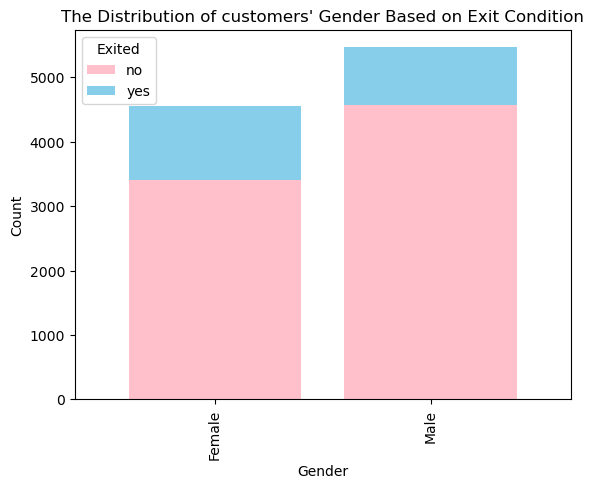

In [6]:
# Investigation of relationship between Exit Status and Gender*:
exit_by_gender = dataset_raw.groupby('Gender')['Exited'].value_counts(normalize=True)
print(exit_by_gender)
df_plot = dataset_raw.groupby(['Gender', 'Exited']).size().unstack().plot(
    kind='bar', stacked=True, color=['Pink', 'skyblue'], width=0.8
)
# Set plot title and labels
plt.title('The Distribution of customers\' Gender Based on Exit Condition')
plt.ylabel('Count')
print("The counts show a slight difference in gender distribution between customers who have exited and those who haven't. Females are more likely to exit compared to males.")



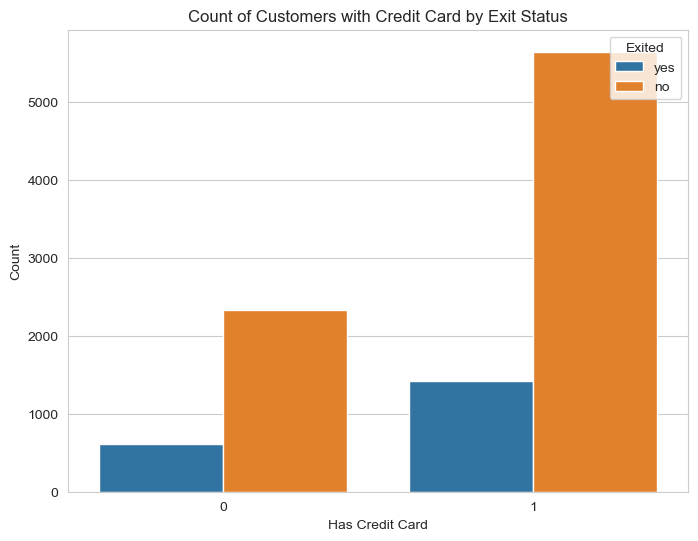

          count unique top  freq
HasCrCard                       
0          2946      2  no  2333
1          7064      2  no  5639
HasCrCard  Exited
0          no        0.791921
           yes       0.208079
1          no        0.798273
           yes       0.201727
Name: proportion, dtype: float64
Having a credit card may not be a significant factor influencing customers' decisions to exit the bank.


In [7]:

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=dataset_raw)
plt.title('Count of Customers with Credit Card by Exit Status')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right')
plt.show()

# Get the general statistics of HasCard of each ExitStatus
exit_by_hasCard = dataset_raw.groupby('HasCrCard')['Exited'].describe()
print(exit_by_hasCard)

# Get the proportion of HasCard of each ExitStatus
prop_card_counts = dataset_raw.groupby('HasCrCard')['Exited'].value_counts(normalize=True)
print(prop_card_counts)
print("Having a credit card may not be a significant factor influencing customers' decisions to exit the bank.")


IsActiveMember  Exited
0               no        0.731562
                yes       0.268438
1               no        0.857448
                yes       0.142552
Name: proportion, dtype: float64


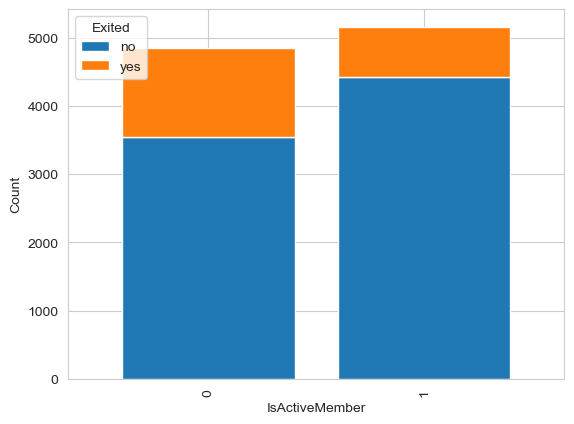

Being a active member may be slighly significant factor influencing customers' decisions to exit the bank.


In [8]:

print(dataset_raw.groupby('IsActiveMember')['Exited'].value_counts(normalize=True))

df_plot = dataset_raw.groupby(['IsActiveMember','Exited']).size().unstack().plot(
    kind='bar', stacked=True, width=0.8)
plt.ylabel('Count')
plt.show()
print("Being a active member may be slighly significant factor influencing customers' decisions to exit the bank.")





HasCrCard  Exited
0          no        0.791921
           yes       0.208079
1          no        0.798273
           yes       0.201727
Name: proportion, dtype: float64


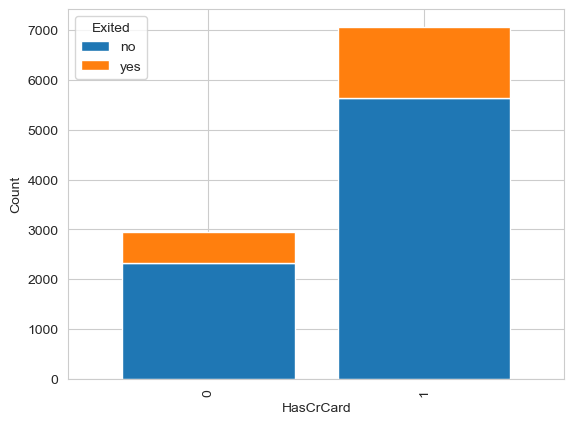

Having a credit card may not be  significant factor influencing customers' decisions to exit the bank.


In [9]:
print(dataset_raw.groupby('HasCrCard')['Exited'].value_counts(normalize=True))

df_plot = dataset_raw.groupby(['HasCrCard','Exited']).size().unstack().plot(
    kind='bar', stacked=True, width=0.8)
plt.ylabel('Count')
plt.show()
print("Having a credit card may not be  significant factor influencing customers' decisions to exit the bank.")




In [10]:
print(dataset_raw.groupby('Exited')['Tenure'].agg(np.mean))
print("Individuals who have exited tend to have 'slightly' shorter tenure compared to those who have not exited.")



Exited
no     5.032740
yes    4.933268
Name: Tenure, dtype: float64
Individuals who have exited tend to have 'slightly' shorter tenure compared to those who have not exited.


/var/folders/dl/y6c96df54f7byh59bmz0bpv00000gn/T/ipykernel_31041/3885563793.py:1: FutureWarning: The provided callable <function mean at 0x106c38680> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(dataset_raw.groupby('Exited')['Tenure'].agg(np.mean))


📝 List the features that are correlated with each other.

What I have found so far:
- Exit Status vs Gender
- Exit Status vs Age
- Exit Status vs Being Active Member
- Exit Status vs Balance


### Question 2: What features seem to be the most correlated with the target variable (label)?  


📝 List the features that are the most correlated with the target variable.

📝 Write a few lines to summarize your data exploration and explain what features you think will be the most useful to predict churn.


1) Age and Exit Status:
- The descriptive statistics for age reveal a notable mean difference between customers who have exited and those who haven't.
Older people are more likely to exit from the bank compared to younger individuals.
The mean age of customers who have exited (44.83 years) is higher than those who haven't (37.40 years).

2) Gender and Exit Status:
- The counts show a difference in gender distribution between customers who have exited and those who haven't.
Among customers who have exited, there are more females (1140) than males (4563), indicating that females are more likely to exit compared to males.

3) Being Active Member:
- Being a active member may be slighly significant factor influencing customers' decisions to exit the bank.

4) Balance:
- Most likely,  people with higher balance status are exiting from the bank. Considerable mean difference.


In summary, being Active Member, balance status, age and gender appear to be significant factors in predicting churn. Therefore, these features could be valuable predictors of churn in predictive modeling efforts. Still, it may be beneficial to explore other variables in the dataset to further understand customer behavior and identify additional predictors of churn since we dont know exactly whether the mean differences we found were not significant are not. Also, we cant know the hidden insight of the data, how those other features would improve the model accuracy. Therefore, it is better to still involve most relevant ones.


# Data Cleaning 
## Data diagnosis
Before building your data cleaning pipeline, make a diagnosis on your data.
### Check if the dataset contains aberrant data points or missing data.

In [11]:
for variable in dataset_raw.columns:
    if dataset_raw[variable].isnull().sum()!=0:
        print(f"The variable/feature is {variable} and it has {dataset_raw[variable].isnull().sum()} amount of missing data.")


The variable/feature is CreditScore and it has 295 amount of missing data.


### 📝 List the variables that you think are irrelevant for the problem at hand and **explain why**.

RowNumber	
CustomerId	
Surname	

We are interested with the relevant features who can help us to predict the exit status, not customer identifiers.

## Pipeline
You will build a rudimentary pipeline to prepare your data. Fill the function called clean_data, that will perform the following cleaning tasks :
Make sure that all your operations create a NEW dataframe and DON'T CHANGE THE ORIGINAL _dataset_raw_.
- Drop duplicates 
- Fix missing data
- Remove aberrant data points
- Drop features that you consider irrelevant for the problem at hand.

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.stats import zscore

## Some Exp:
# The process: Clean - Split - Transform (Encoding + Feature Sclain: Pipeline)
#Binary Variables (Categorical): Gender, HasCrCard, and IsActiveMember are assumed to be binary categorical variables. 
#I am applying binary encoding (using ordinal encoding) for these variables.

#Categorical Variable with More than 2 Categories: Geography is assumed to be a categorical variable with more than two categories.  
#I am applying dummy encoding (one-hot encoding) for this variable.

#Continuous Variables: CreditScore, Age, Tenure, Balance, NumOfProducts, and EstimatedSalary are continuous variables.
#I am applying feature scaling (using StandardScaler) for these variables to ensure they have a similar scale and contribute equally to the model.


# Define categorical, binary, and numerical variables
categorical_variables = ['Geography']
binary_variables = ['Gender', 'HasCrCard', 'IsActiveMember']
numerical_variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
removed_columns = ['RowNumber', 'CustomerId', 'Surname']  # Specify the columns to be removed

# Define the ColumnTransformer for encoding and scaling
global_encoder = ColumnTransformer(transformers=[
    ('one_hot', OneHotEncoder(), categorical_variables),
    ('ordinal', OrdinalEncoder(), binary_variables),
    ('scaler', StandardScaler(), numerical_variables)
], remainder='passthrough')

# Create the pipeline
pipe = Pipeline([
    ('encoder', global_encoder)
    # Add more steps as needed
])


# Define the clean_data function: Drop duplicates, remove unnecesary columns, and exclude the outliers: z score critera (3 std away instances)
def clean_data(dataset_raw: pd.DataFrame, removed_columns: list):
    data_new = dataset_raw.copy()
    data_new = data_new.drop_duplicates().reset_index(drop=True)
    data_new = data_new[data_new['Age'] > 0]

    # Defining the columns:
    numeric_cols = data_new.select_dtypes(include=['int64', 'float64']).columns
    categ_cols = data_new.select_dtypes(include=['object']).columns

    # Imputition for different features: 
    imputer = SimpleImputer(strategy='mean')
    data_new[numeric_cols] = imputer.fit_transform(data_new[numeric_cols])
    imputer = SimpleImputer(strategy='most_frequent')
    data_new[categ_cols] = imputer.fit_transform(data_new[categ_cols])

    # Remove outliers separately for each numerical column
    for col in numeric_cols:
        z_scores = stats.zscore(data_new[col])
        # Set a threshold for removing outliers
        threshold = 3
        # Get boolean mask where z-scores are greater than the threshold
        mask = (abs(z_scores) <= threshold)
        # Keep only rows where z-scores are within the threshold for the current column
        data_new = data_new[mask]
    
        # Drop irrelevant columns
    data_new = data_new.drop(removed_columns, axis=1)

    return data_new







Execute your pipeline to clean your data and store it in a new variable: dataset_clean

In [13]:
############################ Clean the dataset : Function call ####################

dataset_clean: pd.DataFrame = clean_data(dataset_raw, removed_columns)
# Automatic test
assert dataset_clean is not dataset_raw, "Your clean_data function should return a new DataFrame without changing the input one."
assert dataset_clean.isna().sum().sum() == 0, "Your clean dataset shouldn't have any missing data."
assert set(dataset_clean) != set(dataset_raw), "You should drop the variables that are not useful."


# Data Splitting 
- Separate your features (X) from your target variable (y).
- Split the dataset in a Train vs Test set (25% should be used as test set).

At the end of this step, you should end up with the following variables:  
X_train_clean  
y_train_clean  
X_test_clean  
y_test_clean  

In [14]:
####################################### Data Split #######################################
from sklearn.model_selection import train_test_split
X = dataset_clean.drop(['Exited'], axis=1)
y = dataset_clean[['Exited']]
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
X, y, test_size = 0.25, random_state = 1)

# Data Transformation 
Prepare the dataset for modelling:
   - Encode variables to make them all numerical
   - Perform feature scaling on non-encoded numerical features  

You should end up with the follwing variables:  
X_train  
y_train  
X_test  
y_test  

In [15]:
##################################### Using Pipeline for  Encoding + Featuring #######################################
X_train = pipe.fit_transform(X_train_clean)
X_test = pipe.transform(X_test_clean)
print(X_train)
print(X_test)

####################################### Encoding Label: #######################################
from sklearn.preprocessing import LabelEncoder
# Assuming y_train_clean and y_test_clean are already defined
label_encoder = LabelEncoder()
# Fit label encoder on y_train_clean and transform both y_train_clean and y_test_clean
y_train = label_encoder.fit_transform(y_train_clean)
y_test = label_encoder.transform(y_test_clean)
# Print transformed target variables

[[ 1.          0.          0.         ... -0.16061806 -0.94603311
   0.26589658]
 [ 0.          0.          1.         ...  0.09415747 -0.94603311
   0.11999428]
 [ 0.          1.          0.         ...  1.26584783 -0.94603311
  -0.56129083]
 ...
 [ 0.          0.          1.         ... -1.21514025  0.87084512
  -0.32230482]
 [ 0.          0.          1.         ... -1.21514025  0.87084512
  -1.60078748]
 [ 0.          1.          0.         ...  0.64573882 -0.94603311
   0.42062887]]
[[ 1.          0.          0.         ... -1.21514025  0.87084512
  -0.1013914 ]
 [ 1.          0.          0.         ...  0.55957607 -0.94603311
  -0.90323297]
 [ 1.          0.          0.         ...  0.66013116  0.87084512
  -0.08157603]
 ...
 [ 1.          0.          0.         ... -1.21514025  0.87084512
   1.2580018 ]
 [ 1.          0.          0.         ...  0.57716287  0.87084512
  -1.21426617]
 [ 1.          0.          0.         ...  1.2570851   0.87084512
  -0.87781698]]


/Users/xenanurbilgin/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xenanurbilgin/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


### <span style="color:red"> SOLUTION 2 </span>   

I was trying the follow previous template, here I would like to leave the second solution I found. Here more optimized version:

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Define categorical, binary, and numerical variables
categorical_variables = ['Geography']
binary_variables = ['Gender', 'HasCrCard', 'IsActiveMember']
numerical_variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
removed_columns = ['RowNumber', 'CustomerId', 'Surname']  # Specify the columns to be removed

# Define the clean_data function: Drop duplicates, remove unnecessary columns, and exclude the outliers: z score criteria (3 std away instances)
def clean_data(dataset_raw: pd.DataFrame, removed_columns: list):
    dataset_clean = dataset_raw.copy()
    dataset_clean = dataset_clean.drop_duplicates().reset_index(drop=True)
    # Drop irrelevant columns
    dataset_clean = dataset_clean.drop(removed_columns, axis=1)
    dataset_clean = dataset_clean[dataset_clean['Age'] > 0]
    return dataset_clean

# Define the split function
def split(dataset_clean: pd.DataFrame):
    X = dataset_clean.drop(['Exited'], axis=1)
    y = dataset_clean['Exited']
    X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
        X, y, test_size=0.25, random_state=1)
    return X_train_clean, X_test_clean, y_train_clean, y_test_clean

# Create the pipeline
pipeline = Pipeline([
    ('clean_data', FunctionTransformer(func=clean_data, kw_args={'removed_columns': removed_columns})),
    ('split', FunctionTransformer(func=split)),
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_variables),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder())
        ]), categorical_variables)
    ]))
])


In [17]:
##### Using Pipeline for  Encoding + Featuring:
X_train = pipe.fit_transform(X_train_clean)
X_test = pipe.transform(X_test_clean)
###### Encoding Label:
from sklearn.preprocessing import LabelEncoder
# Assuming y_train_clean and y_test_clean are already defined
label_encoder = LabelEncoder()
# Fit label encoder on y_train_clean and transform both y_train_clean and y_test_clean
y_train = label_encoder.fit_transform(y_train_clean)
y_test = label_encoder.transform(y_test_clean)

/Users/xenanurbilgin/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/xenanurbilgin/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
